In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yoda_simulator as ys
%matplotlib inline

In [2]:
#get portfolio 1
iex_df = pd.read_pickle("./iex3years")
iex_df.drop(columns=['volume'], level=1, inplace=True)
iex_df.columns = iex_df.columns.droplevel(1)
iex_df.sort_index(ascending = True, inplace = True)

# Calculate the daily roi for the stocks
daily_return = iex_df.pct_change().dropna()

cal_avg = pd.DataFrame(daily_return.mean()).rename(columns = ({0:'avg'}))
cal_std = pd.DataFrame(daily_return.std()).rename(columns = ({0:'std'}))
portfolio1 = pd.concat((cal_avg, cal_std), axis = 1).T
portfolio1.loc['weight','SPY'] = 0.4
portfolio1.loc['weight','AGG'] = 0.6
portfolio1.loc[:,'XYZ'] =[0.000002,0.03,0.0]
portfolio1

,SPY,AGG,XYZ
avg,0.000507,0.000052,0.000002
std,0.008114,0.001879,0.030000
weight,0.400000,0.600000,0.000000


In [3]:
#get portfolio 2
portfolio2 = pd.DataFrame([[0.0002,0.000009,0.0002,0.00008],
                           [0.00003,0.0083,0.0005,0.000865],
                           [0.2,0.1,0.3,0.4]])
portfolio2

,0,1,2,3
0,0.00020,0.000009,0.0002,0.000080
1,0.00003,0.008300,0.0005,0.000865
2,0.20000,0.100000,0.3000,0.400000


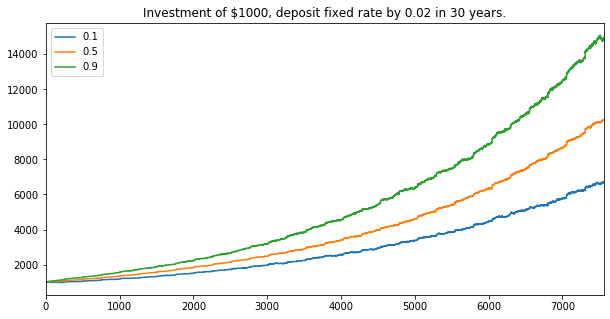

In [5]:
#ys.quantile_chart(portfolio, initial_investment,withdraw_type('fixed amount' or 'fixed rate'), withdraw amount or withdraw rate, years to retirement)

ys.quantile_chart(portfolio1, 1000,'fixed rate', -0.02,30)

In [ ]:
#ys.quantile_chart(portfolio, initial_investment,withdraw_type('fixed amount' or 'fixed rate'), withdraw amount or withdraw rate, years to retirement)

ys.quantile_chart(portfolio1, 1000,'fixed rate', 0.00,30)

In [ ]:
ys.simulation_chart(portfolio1, 1_000_000,'fixed amount', 60_000,20)

In [ ]:
ys.confidence_interval(portfolio2, 10_000,'fixed amount', 100,20)

In [ ]:
ys.quantile_chart(portfolio1, 1_000_000,'fixed rate', -0.06,20)

In [ ]:
ys.simulation_chart(portfolio1, 1_000_000,'fixed rate', 0.06,20)

In [ ]:
ys.confidence_interval(portfolio1, 1_000_000,'fixed rate', 0.06,20)

In [6]:
%%time
#ys.search_withdraw_amount(portfolio,initial_investment,years_to_retirement,target_return)
result = ys.search_withdraw_amount(portfolio1,10000,30,60000)

CPU times: user 32.9 s, sys: 9.53 s, total: 42.4 s
Wall time: 42.7 s


In [8]:
print(result['a'])

Rather than withdrawing, you should deposit $400 annually, and ending 10% percentile balance after 30 years would be $63318.


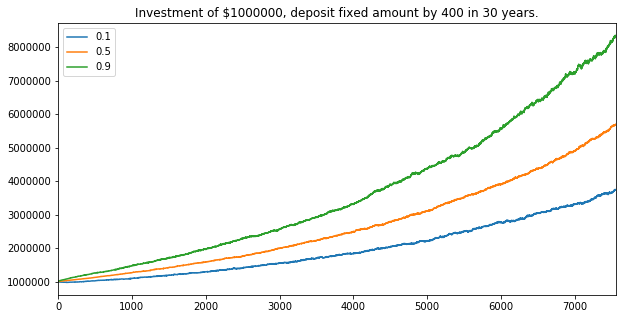

In [9]:
if result['a'] != 'Your target return is out of bound.  Please input reasonable numbers!':
    ys.quantile_chart(portfolio1, 1_000_000,'fixed amount', result['b'],30)

In [ ]:
ys.search_withdraw_amount(portfolio2,10000,20,25000)

In [ ]:
%%time
ys.search_withdraw_rate(portfolio1,10000,20,22000)

In [ ]:
ys.search_withdraw_rate(portfolio1,10000,20,200000)